# ISL Alphabet Recognition with PCA + k-NN

This notebook loads the ISL-HS dataset, applies PCA for dimensionality reduction, and trains a k-NN classifier to recognize static ISL hand signs (A–Y, excluding J, X, Z).


In [1]:
# Imports & Data Loader
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Define data directory
DATA_DIR = "../ISL/Frames"
IMAGE_SIZE = (64, 64)

def extract_label(filename):
    # Expects filename like: Person1-A-1-3.jpg
    parts = filename.split("-")
    if len(parts) >= 3:
        return parts[1].upper()  # Ensure consistent labels
    return None

def load_data(data_dir):
    X, y = [], []
    for person_folder in os.listdir(data_dir):
        person_path = os.path.join(data_dir, person_folder)
        if not os.path.isdir(person_path):
            continue
        for fname in os.listdir(person_path):
            if not fname.endswith(".jpg"):
                continue
            label = extract_label(fname)
            img_path = os.path.join(person_path, fname)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv2.resize(img, IMAGE_SIZE)
            X.append(img.flatten())
            y.append(label)
    return np.array(X), np.array(y)

print("Loading images...")
X, y = load_data(DATA_DIR)
print(f"Loaded {len(X)} images. Image shape: {IMAGE_SIZE}")


Loading images...
Loaded 58114 images. Image shape: (64, 64)


In [2]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")


Train size: 40679, Test size: 17435


In [3]:
# Apply PCA
n_components = 50  # You can experiment with this
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"PCA reduced dimensions from {X_train.shape[1]} to {n_components}")


PCA reduced dimensions from 4096 to 50


In [4]:
# Train k-NN and Evaluate
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)

y_pred = knn.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {acc:.4f}")


Test accuracy: 0.9538


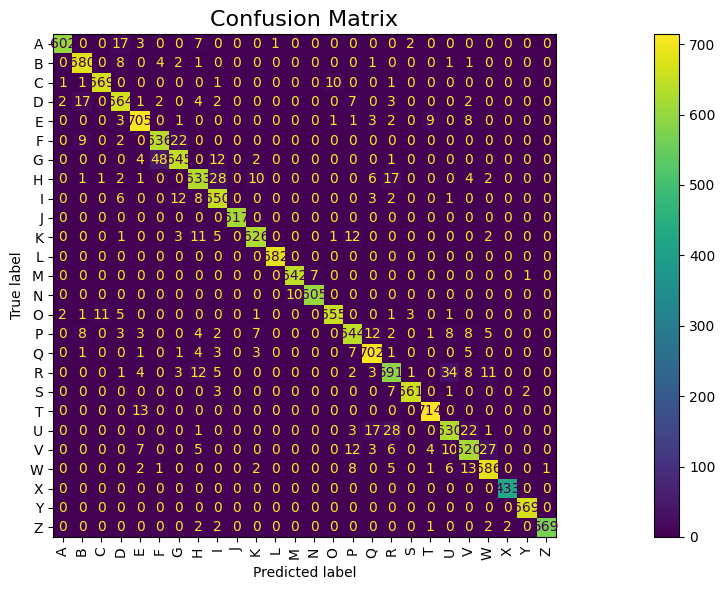

In [14]:
# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(20, 6))  # Wider x-axis only
cm = confusion_matrix(y_test, y_pred, labels=sorted(set(y)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(set(y)))
disp.plot(
    xticks_rotation='vertical',
    cmap='viridis',
    values_format='d',
    ax=ax  # apply to your custom-sized plot
)
plt.title("Confusion Matrix", fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [15]:
import joblib
joblib.dump((pca, knn), "isl_pca_knn_model.pkl")


['isl_pca_knn_model.pkl']